In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import vincent

import seaborn as sns

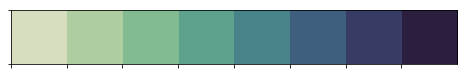

In [36]:
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

In [150]:
data = pd.read_csv('data_final2.csv', encoding = "ISO-8859-1")
data = data[data['dataset']=='train']
data.loc[(data['ct_median_income'] < 0 ), 'ct_median_income'] = 0
data['log_income'] = np.log(data['ct_median_income'])

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


### Income

In [4]:
data['log_income'] = np.log(data['ct_median_income'])


C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


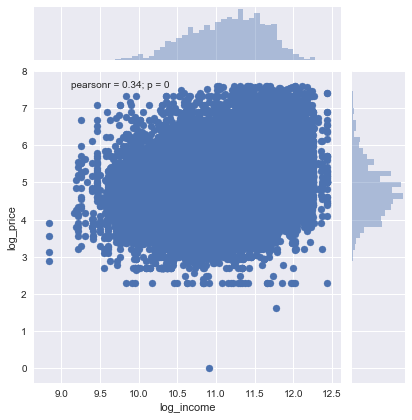

In [151]:
sns.jointplot(x='log_income', y='log_price', data=data[data['ct_median_income']!=0])

In [ ]:
fig, axes = plt.subplots(nrows=10, ncols=10, sharey=False)
fig.set_size_inches(60, 50)
for i in range(len(nearby_places)):
    sns.barplot(x=data[nearby_places[i]], y=data['log_price'], ax=axes[int(i/10)][(i%10-1)])

In [23]:
cities = ['Boston', 'NYC', 'DC', 'SF', 'LA', "Chicago"]

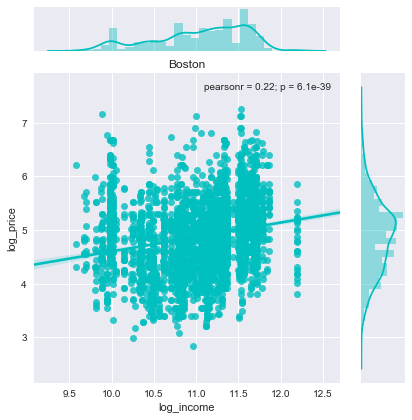

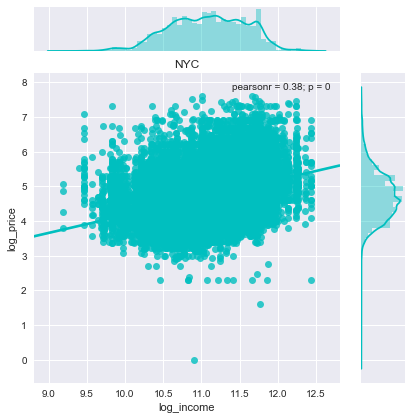

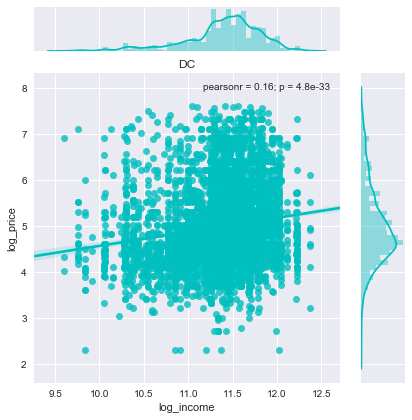

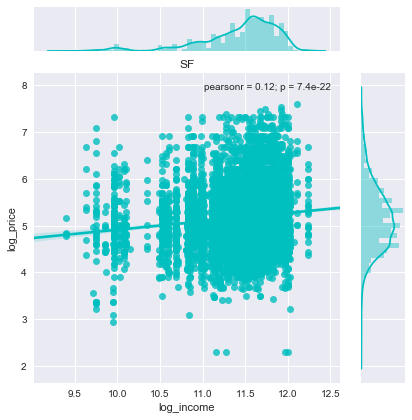

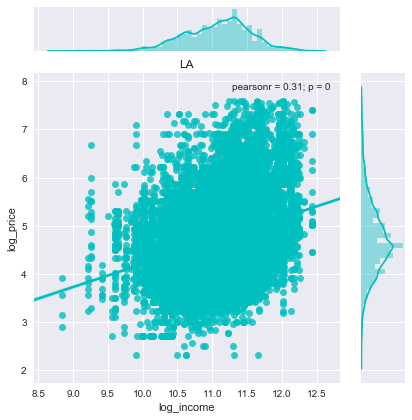

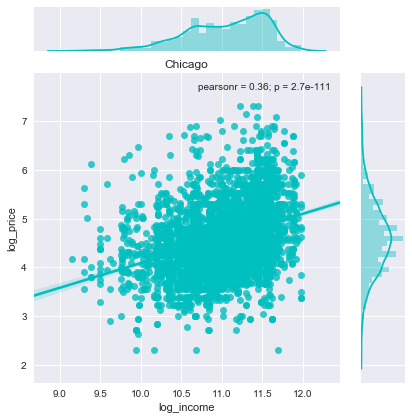

In [152]:
for c in cities:
    d = data[(data['ct_median_income']!=0) & (data['city']==c)]
    g = sns.jointplot('log_income', 'log_price', data=d, kind='reg', color='c', space=0.5, ratio=5)
    plt.title(c)

##### How does impact of income level on price vary by neighborhood?

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


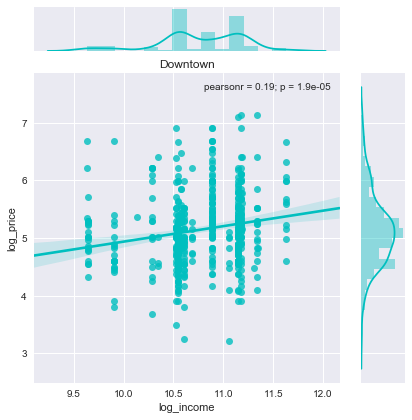

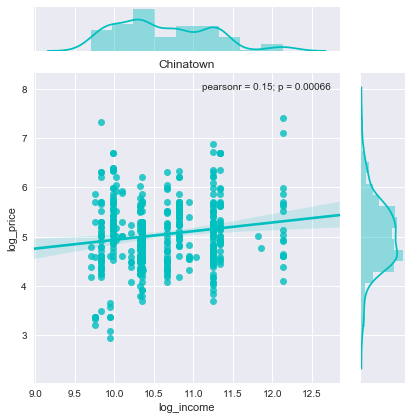

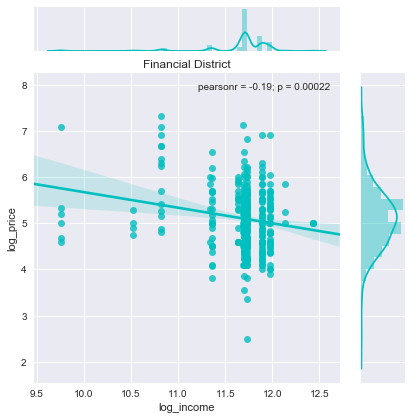

In [159]:
### Boston
t = pd.read_csv('data_final.csv', encoding = "ISO-8859-1")
t = t[t['dataset']=='train']
t['log_income'] = np.log(t['ct_median_income'])
most_expensive_towns = ['Downtown', 'Chinatown', 'Financial District']
for c in most_expensive_towns:
    d = t[(t['ct_median_income']!=0) & (t['neighbourhood_'+c]==1)]
    g = sns.jointplot('log_income', 'log_price', data=d, kind='reg', color='c', space=0.5, ratio=5)
    plt.title(c)

Within neighborhoods, the impact of income levels on price can vary; however, for many neighborhoods, the data points are too few to find relationships at this granularity. (For instance, many neighborhoods only have data between 1-3 points)

### Distance From City Center

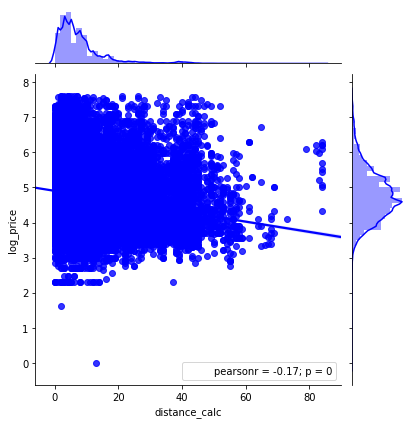

In [42]:
sns.jointplot(x='distance_calc', y='log_price', color='b', kind='reg', data=data)

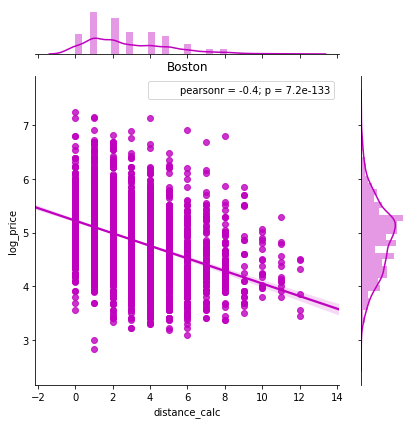

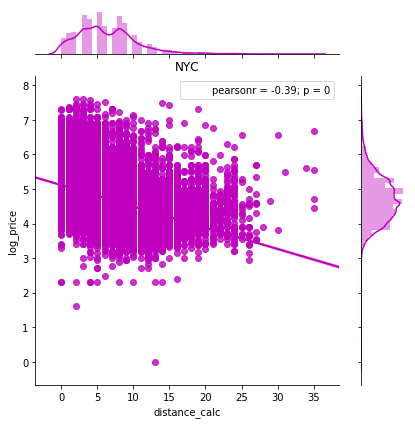

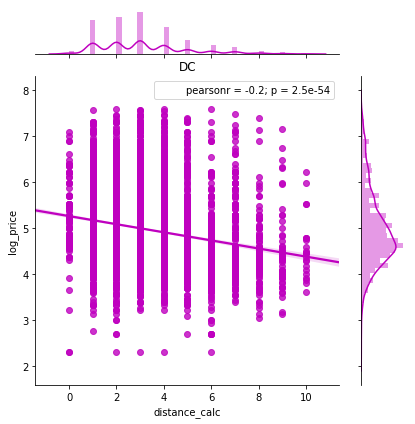

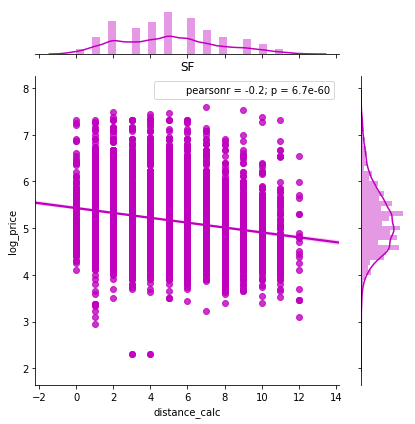

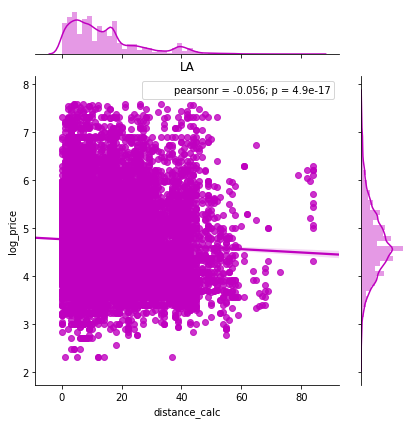

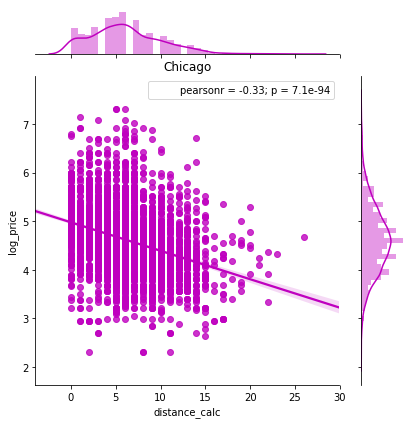

In [54]:
for c in cities:
    d = data[data['city']==c]
    g = sns.jointplot('distance_calc', 'log_price', data=d, kind='reg', color='m', space=0.5, ratio=5)
    plt.title(c)

### How Property Size Indicators' Effects vary by City

[None, None]

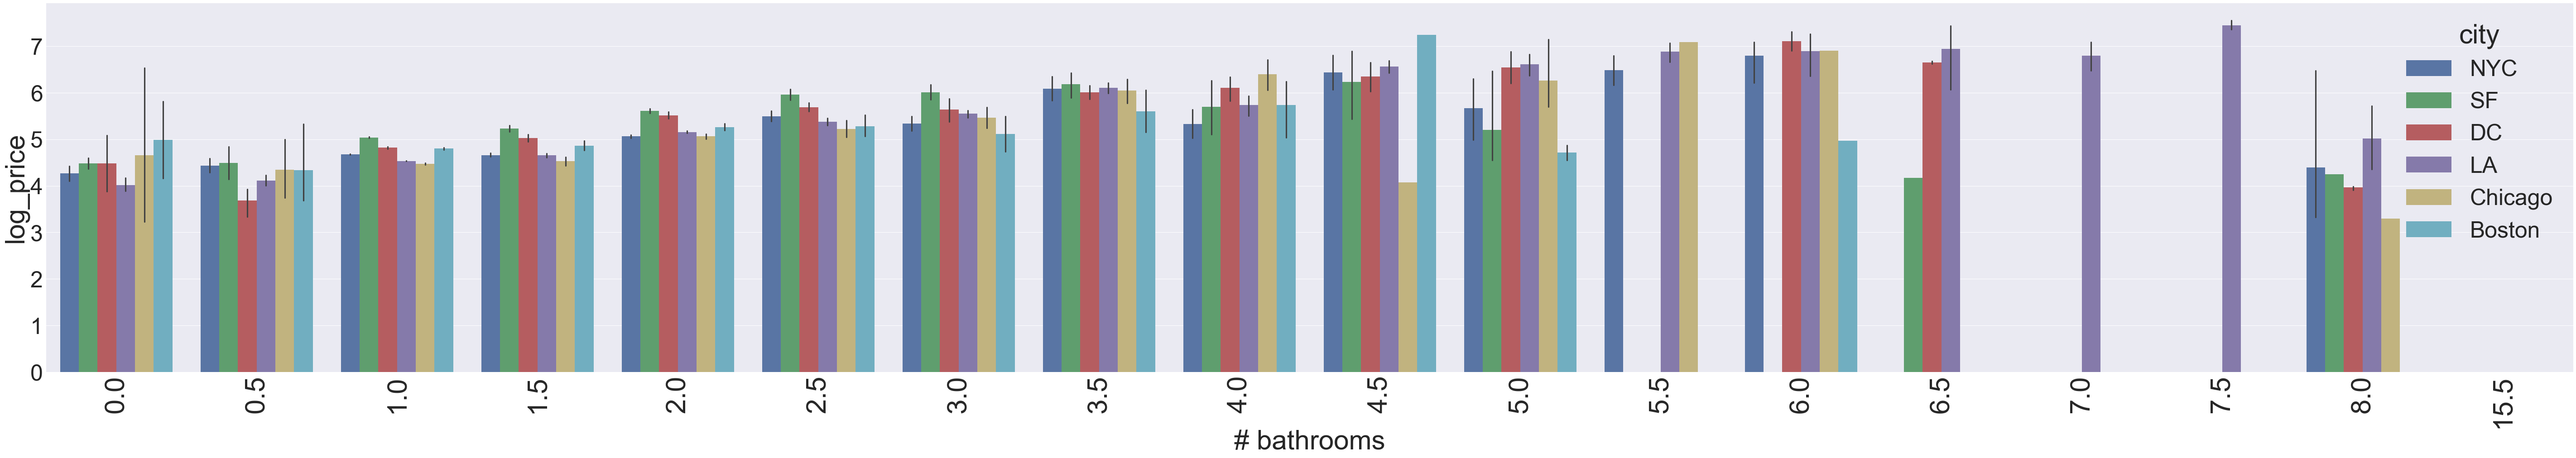

In [98]:
# Bathrooms
sns.set(font_scale=5)
fig, ax = plt.subplots(figsize=(100, 15))
bathrooms = sorted(data['bathrooms'].value_counts().index.unique())
g = sns.barplot(ax=ax, x="bathrooms", y="log_price", hue='city', orient='v', data=data)
g.set_xticklabels(bathrooms, rotation=90, fontsize = '60')
g.set_ylabel('log_price', fontsize='60')
g.set_xlabel('bathrooms', fontsize='60')
plt.setp(ax.get_legend().get_texts(), fontsize='50') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='60') # for legend title

In [92]:
data[data['bathrooms']==5.0]['city'].value_counts()

LA         58
NYC        17
Chicago     6
SF          4
DC          2
Boston      2
Name: city, dtype: int64

In [95]:
data[data['bathrooms']==0.0]['city'].value_counts()

LA         130
NYC         66
SF          45
DC          16
Boston       6
Chicago      4
Name: city, dtype: int64

[None, None]

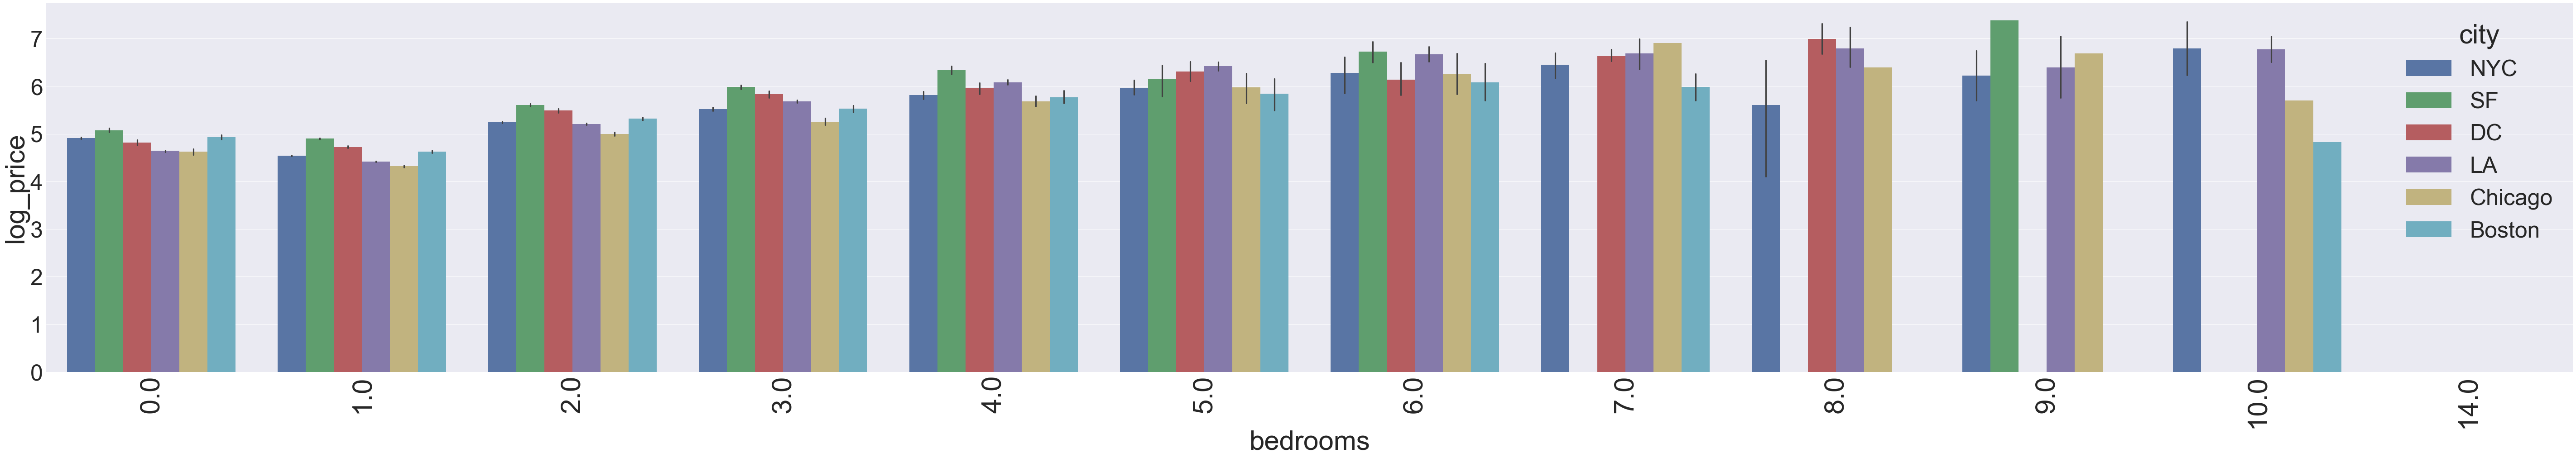

In [99]:
# bedrooms
sns.set(font_scale=5)
fig, ax = plt.subplots(figsize=(100, 15))
bedrooms = sorted(data['bedrooms'].value_counts().index.unique())
g = sns.barplot(ax=ax, x="bedrooms", y="log_price", hue='city', orient='v', data=data)
g.set_xticklabels(bedrooms, rotation=90, fontsize = '60')
g.set_ylabel('log_price', fontsize='60')
g.set_xlabel('bedrooms', fontsize='60')
plt.setp(ax.get_legend().get_texts(), fontsize='50') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='60') # for legend title

[None, None]

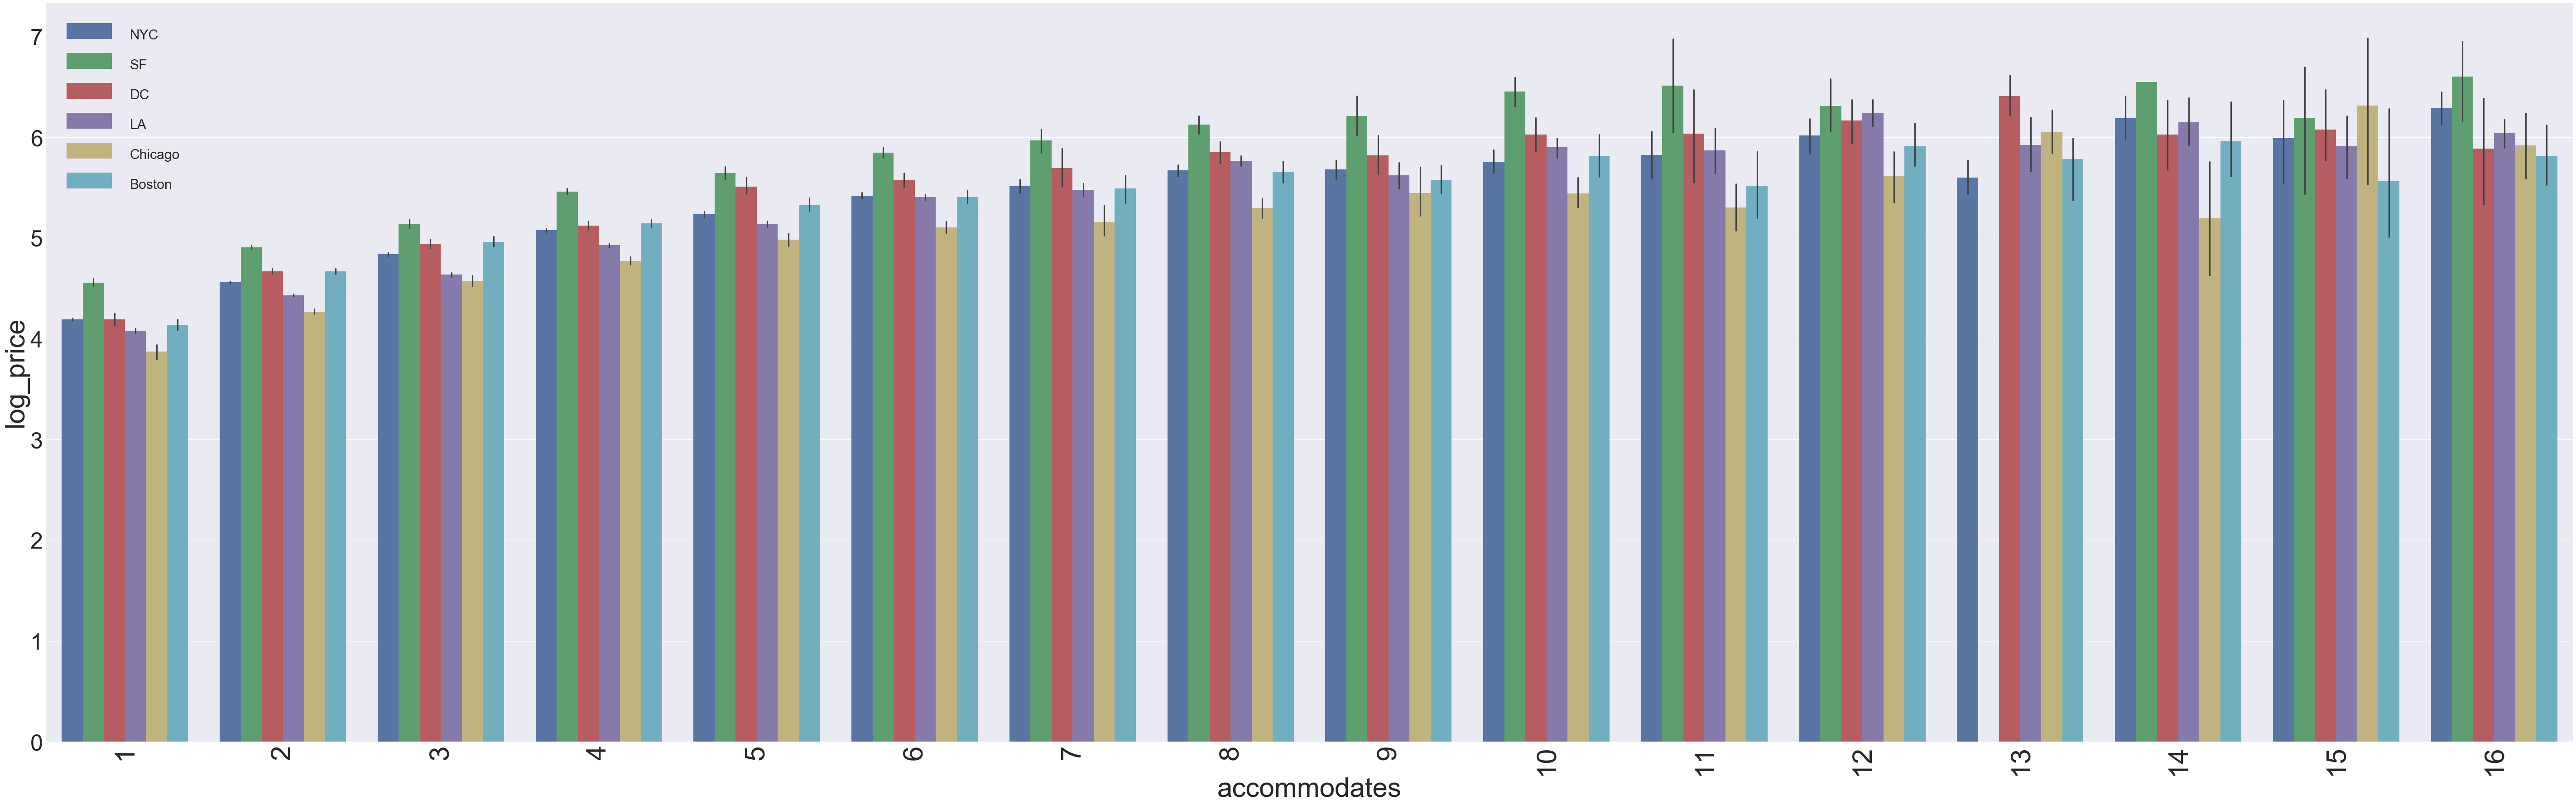

In [110]:
# accommodates
sns.set(font_scale=5)
fig, ax = plt.subplots(figsize=(100, 30))
accommodates = sorted(data['accommodates'].value_counts().index.unique())
g = sns.barplot(ax=ax, x="accommodates", y="log_price", hue='city', orient='v', data=data)
g.set_xticklabels(accommodates, rotation=90, fontsize = '60')
g.set_ylabel('log_price', fontsize='60')
g.set_xlabel('accommodates', fontsize='60')
plt.legend(loc='upper left')
plt.setp(ax.get_legend().get_texts(), fontsize='30') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='60') # for legend title

### Property Factors

[None, None]

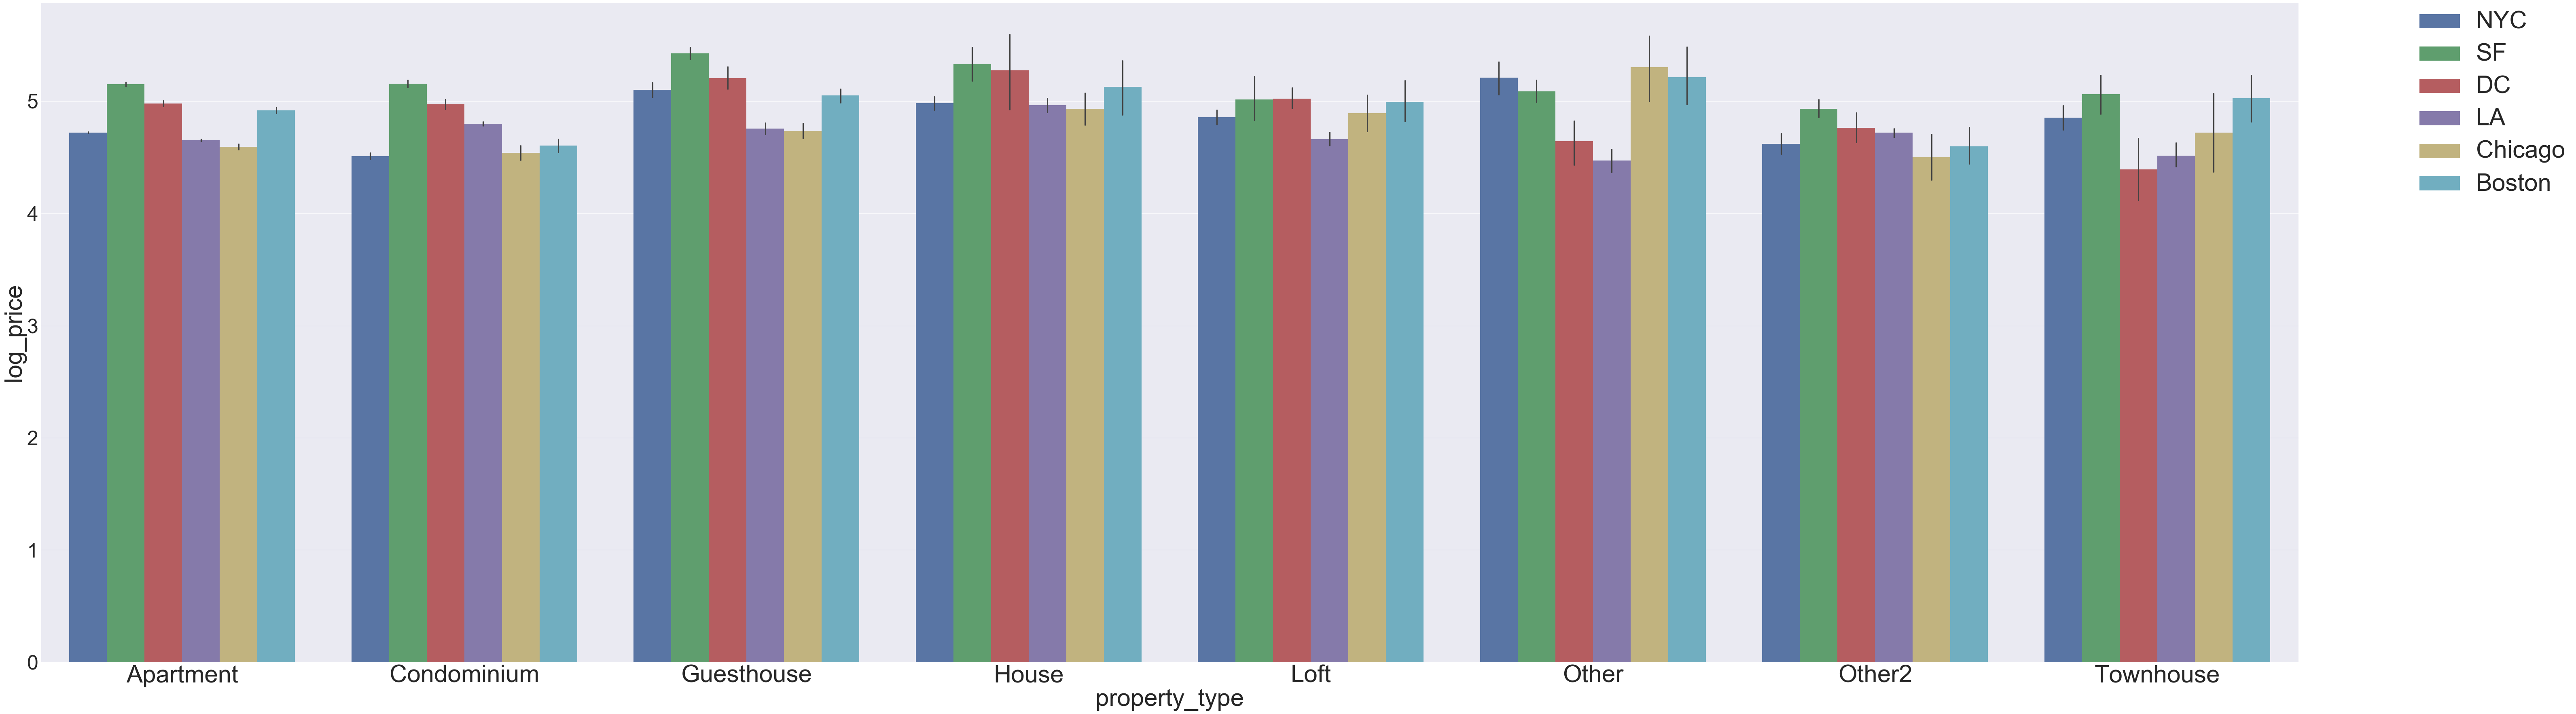

In [119]:
#segment = data[data['property_type'] in (data['property_type'].value_counts().index.unique().tolist()[0:10])]
sns.set(font_scale=5)
fig, ax = plt.subplots(figsize=(100, 30))
property_type = sorted(data['property_type'].value_counts().index.unique())
g = sns.barplot(ax=ax, x="property_type", y="log_price", hue='city', orient='v', data=data)
g.set_xticklabels(property_type, rotation=0, fontsize = '60')
g.set_ylabel('log_price', fontsize='60')
g.set_xlabel('property_type', fontsize='60')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax.get_legend().get_texts(), fontsize='60') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='60') # for legend title

[None, None]

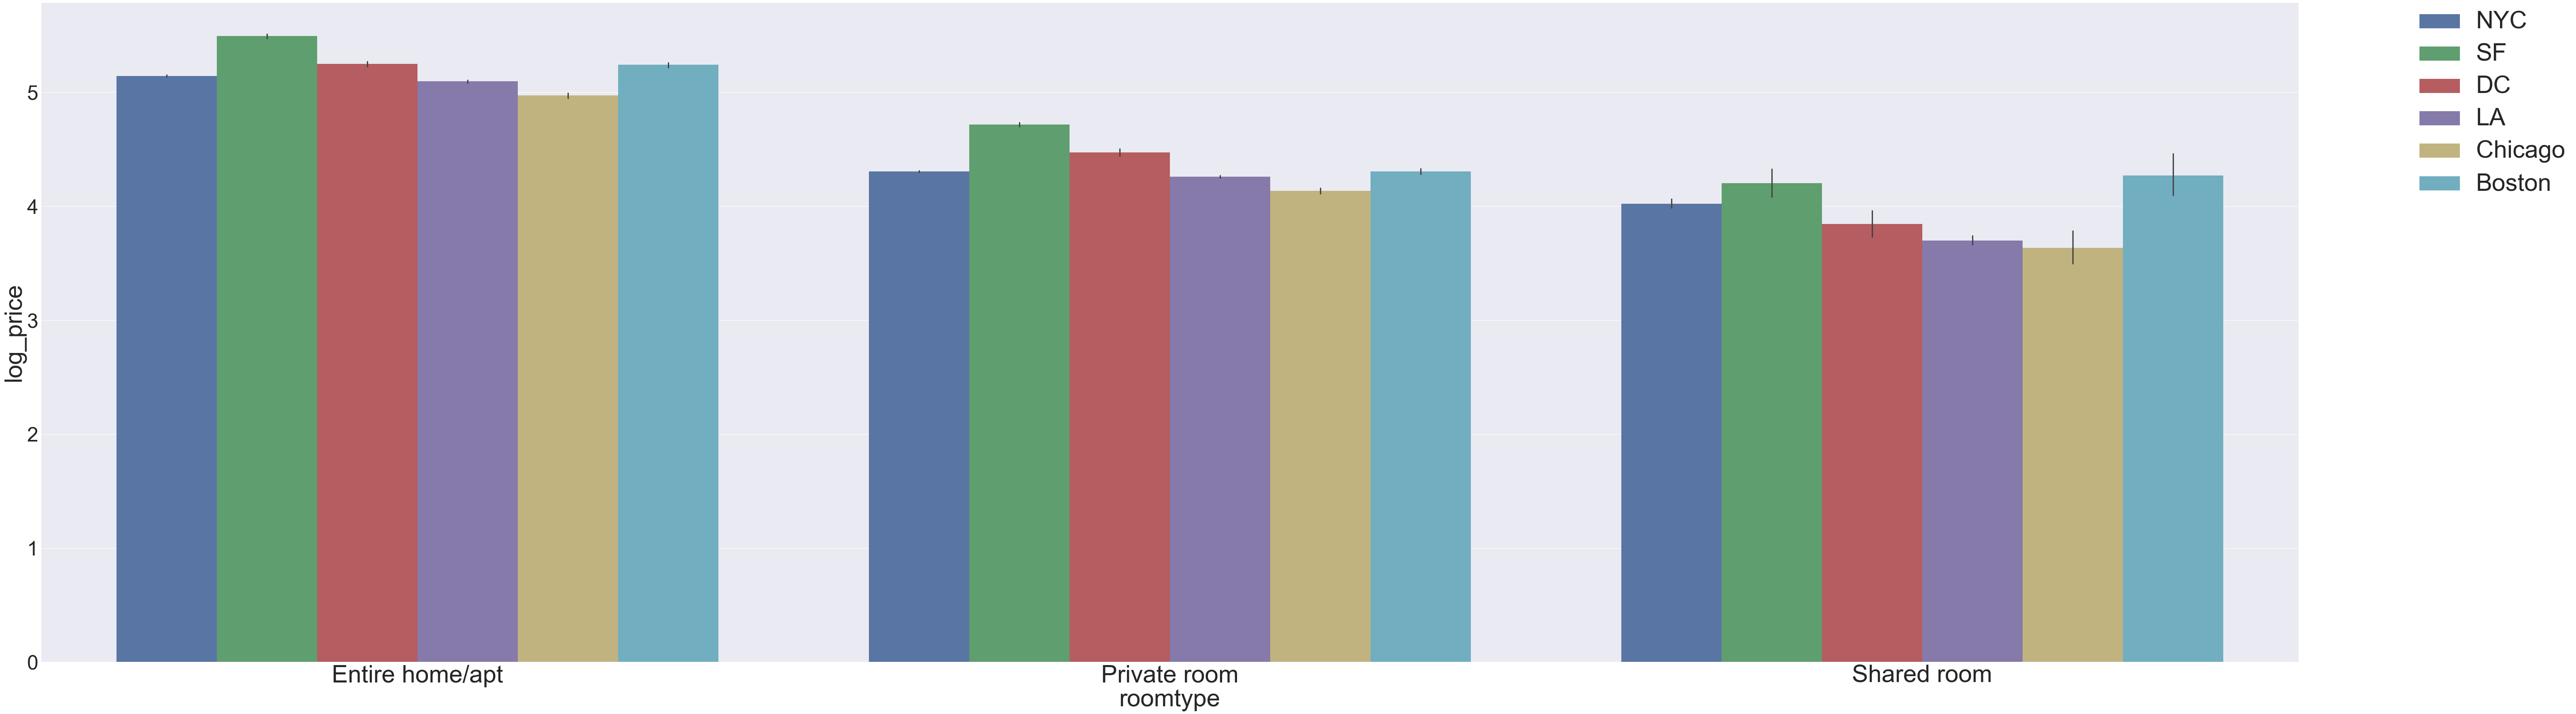

In [121]:
# Room Type
sns.set(font_scale=5)
fig, ax = plt.subplots(figsize=(100, 30))
room_type = sorted(data['room_type'].value_counts().index.unique())
g = sns.barplot(ax=ax, x="room_type", y="log_price", hue='city', orient='v', data=data)
g.set_xticklabels(room_type, rotation=0, fontsize = '60')
g.set_ylabel('log_price', fontsize='60')
g.set_xlabel('roomtype', fontsize='60')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax.get_legend().get_texts(), fontsize='60') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='60') # for legend title

[None, None]

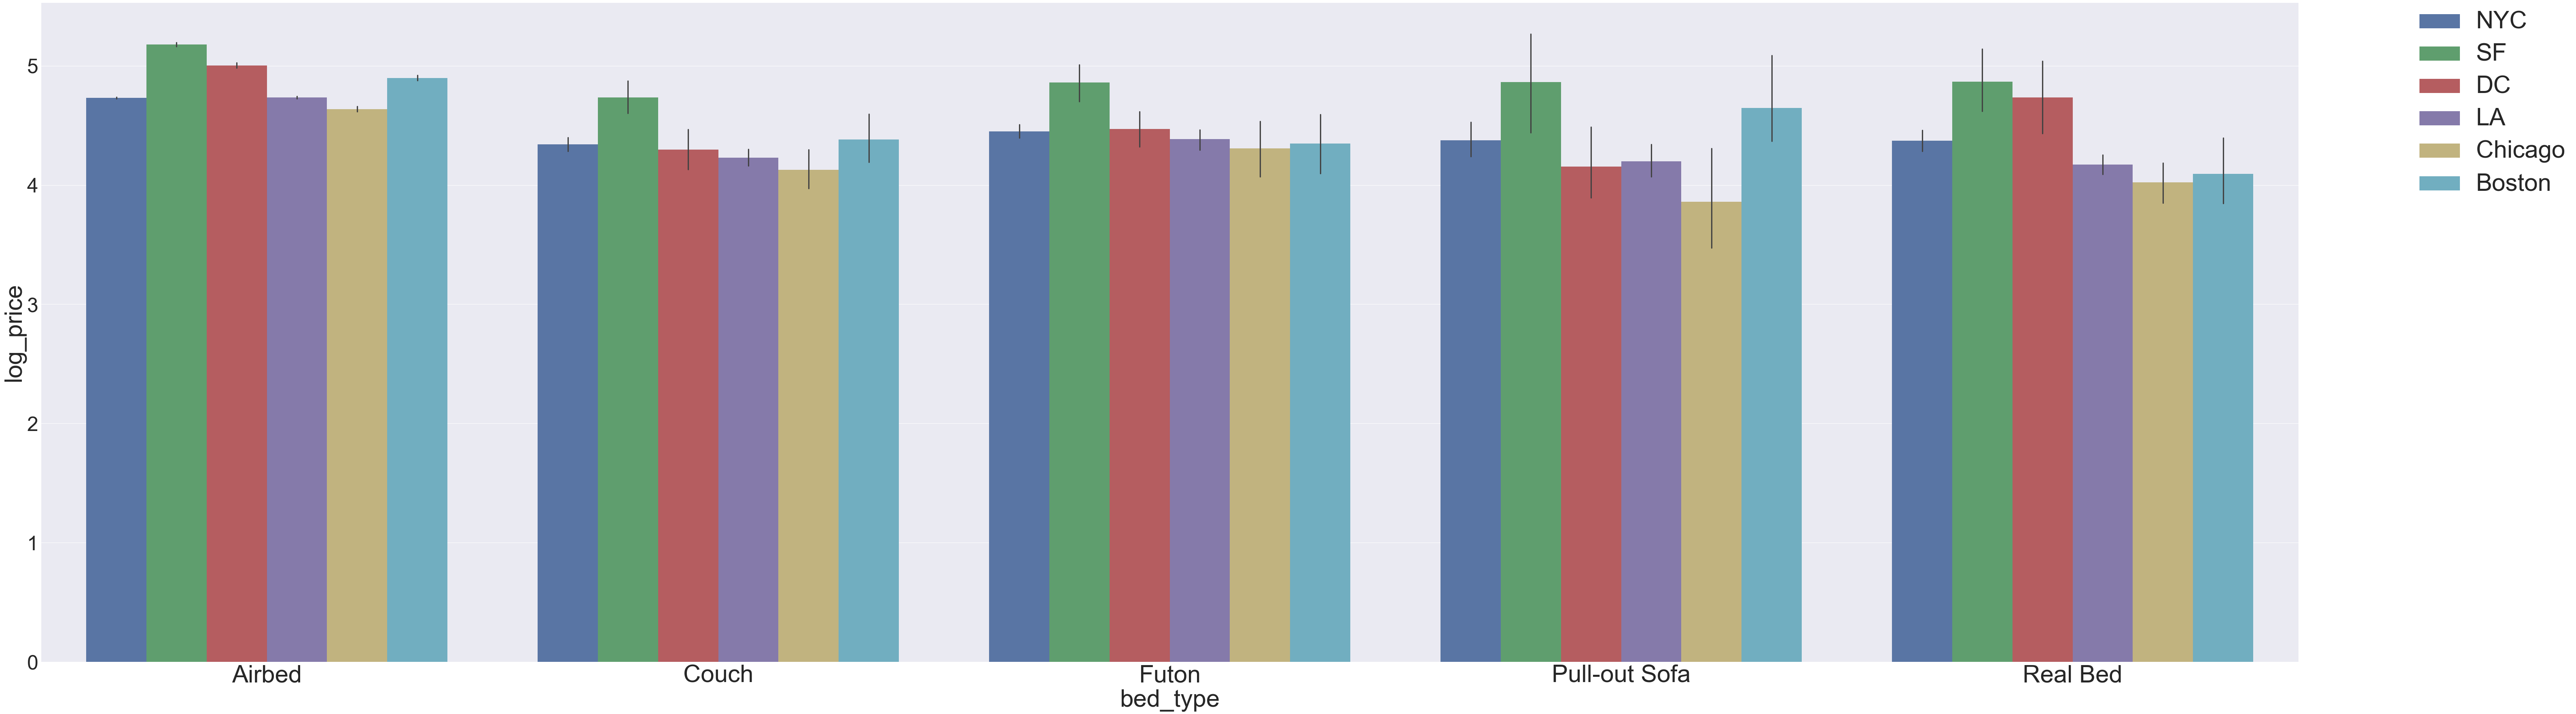

In [122]:
# Bed Type
sns.set(font_scale=5)
fig, ax = plt.subplots(figsize=(100, 30))
bed_type = sorted(data['bed_type'].value_counts().index.unique())
g = sns.barplot(ax=ax, x="bed_type", y="log_price", hue='city', orient='v', data=data)
g.set_xticklabels(bed_type, rotation=0, fontsize = '60')
g.set_ylabel('log_price', fontsize='60')
g.set_xlabel('bed_type', fontsize='60')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax.get_legend().get_texts(), fontsize='60') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='60') # for legend title

### How do other factors impact price

In [123]:
## Host length
data['host_length'].describe()

count    99326.000000
mean      1323.516088
std        661.452250
min        153.000000
25%        805.000000
50%       1254.000000
75%       1779.000000
max       3655.000000
Name: host_length, dtype: float64

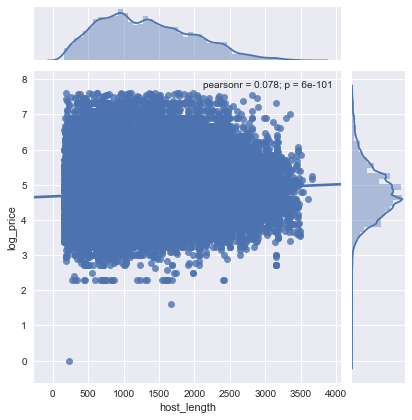

In [135]:
sns.set(font_scale=1)
#fig, ax = plt.subplots(figsize=(100, 30))
sns.jointplot(x='host_length', y='log_price', kind='reg', data=data)

One explanation for the above trend: the longer the person has been a host, the higher they are likely to price a room - but this effect is small.

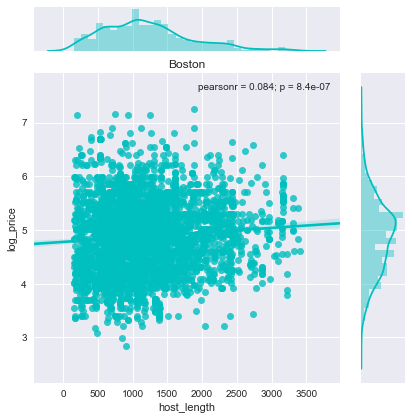

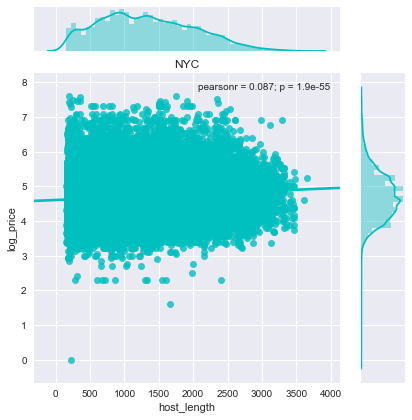

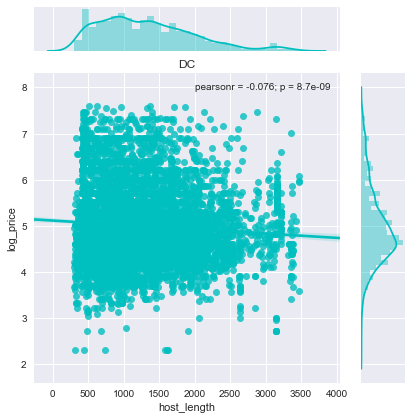

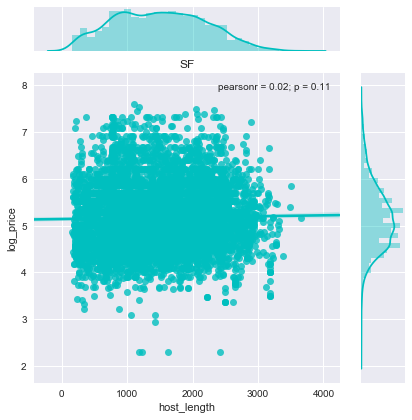

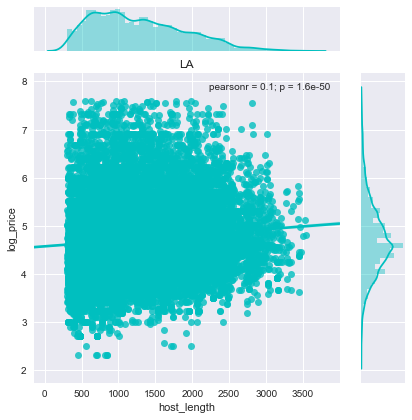

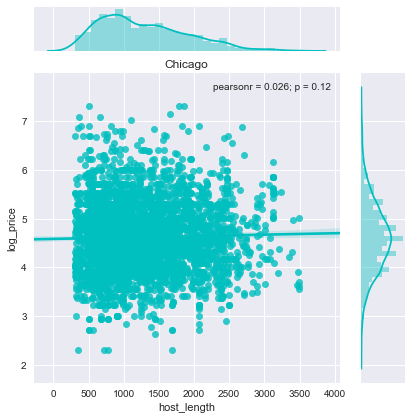

In [167]:
for c in cities:
    d = data[data['city']==c]
    g = sns.jointplot('host_length', 'log_price', data=d, kind='reg', color='c', space=0.5, ratio=5)
    plt.title(c)

It's interesting to see that for SF, the host length does not matter very much. DC is the only area that seems to have a negative correlation.

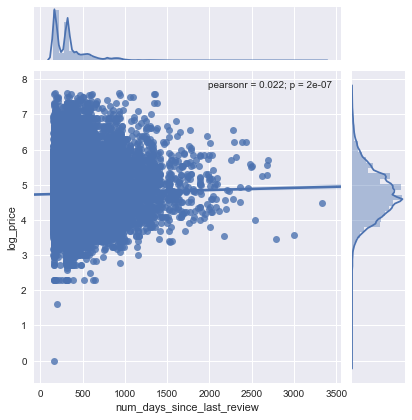

In [142]:
# Number of days since the last review
sns.jointplot(x='num_days_since_last_review', y='log_price', kind='reg', data=data)

In [144]:
data['log_lastreview'] = np.log(data['num_days_since_last_review'])

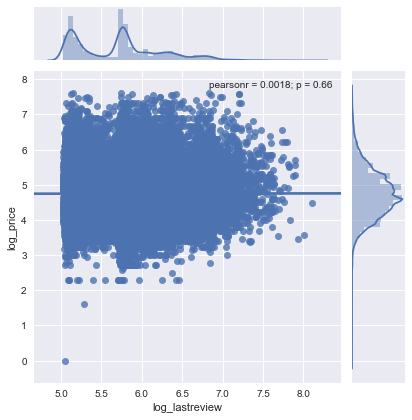

In [145]:
sns.jointplot(x='log_lastreview', y='log_price', kind='reg', data=data)

It looks like the number of days since the last review doesn't play a significant part in pricing

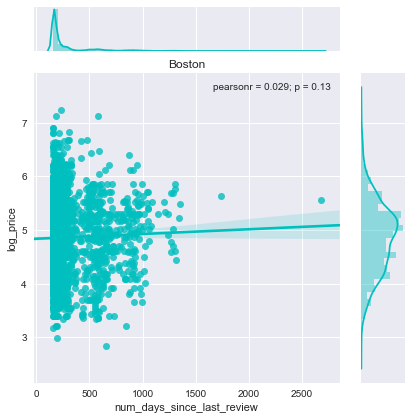

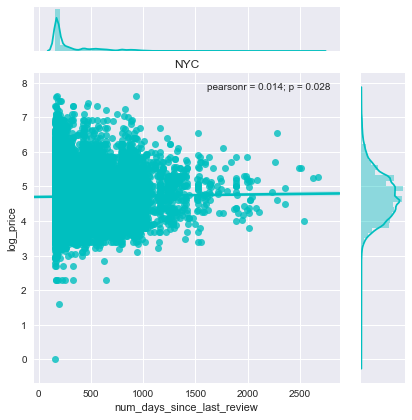

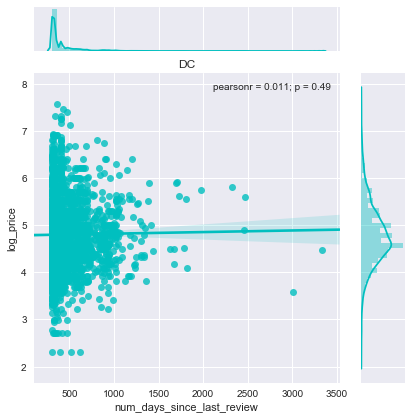

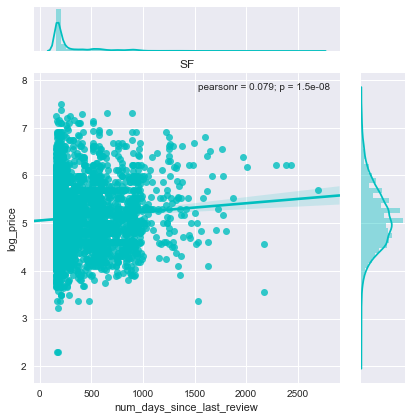

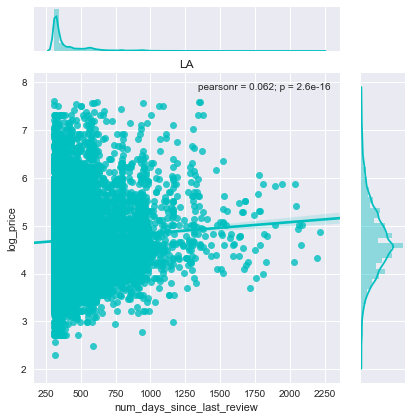

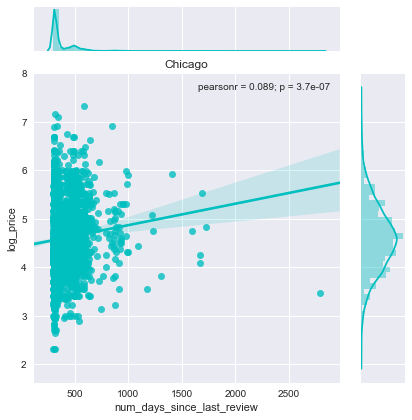

In [168]:
for c in cities:
    d = data[data['city']==c]
    g = sns.jointplot('num_days_since_last_review', 'log_price', data=d, kind='reg', color='c', space=0.5, ratio=5)
    plt.title(c)

In [231]:
train = pd.read_csv('train.csv')
train2 = train[pd.isnull(train['host_response_rate'])==False]

In [232]:
train2['host_response_rate'] = train2['host_response_rate'].map(lambda x: float(x.split('%')[0])/100.00 if isinstance(x,str) else 0)
train2['host_response_rate'].describe()

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    55812.000000
mean         0.943520
std          0.163418
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: host_response_rate, dtype: float64

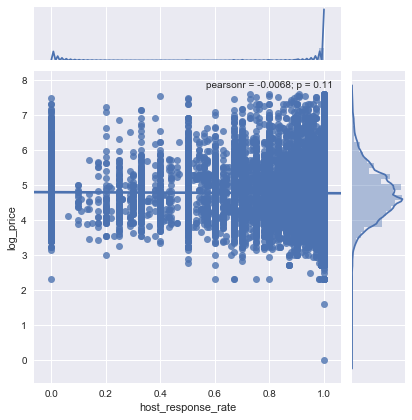

In [233]:
#train2 = train[pd.isnull(train['host_response_rate'])!=0]
sns.jointplot(x='host_response_rate', y='log_price', kind='reg', data=train2)

In [161]:
### Number of reviews
data['number_of_reviews'].describe()

count    74111.000000
mean        20.900568
std         37.828641
min          0.000000
25%          1.000000
50%          6.000000
75%         23.000000
max        605.000000
Name: number_of_reviews, dtype: float64

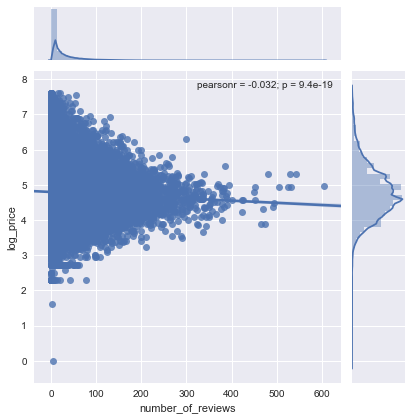

In [162]:
sns.jointplot(x='number_of_reviews', y='log_price', kind='reg', data=data)

Seems number of reviews corresponds to a slightly lower price; one reason for this may be that a place that has a lot of reviews tends to be cheaper; as a result more people come to stay, and leave more reviews.

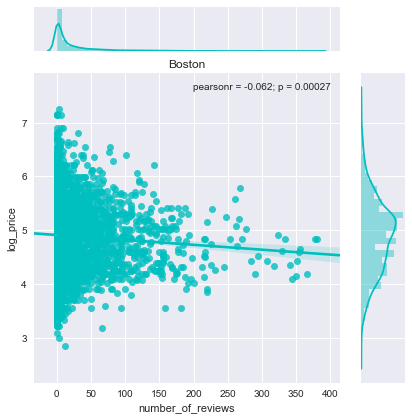

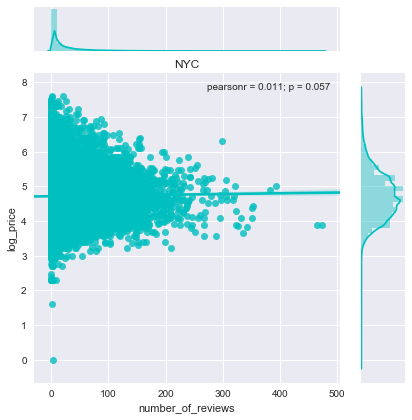

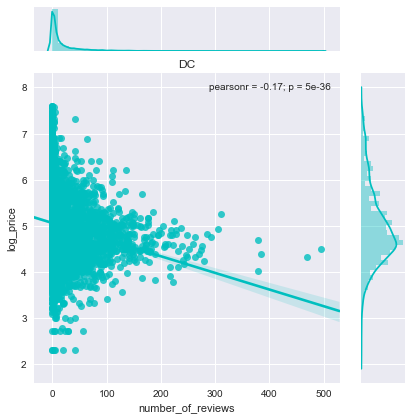

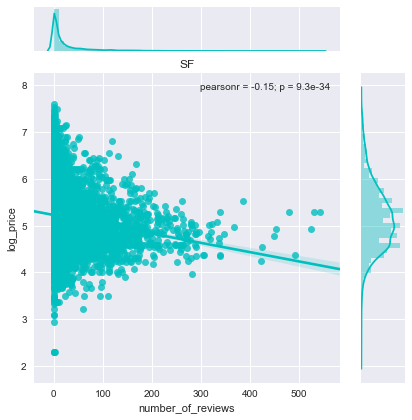

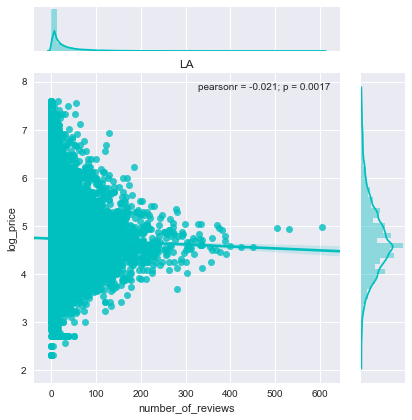

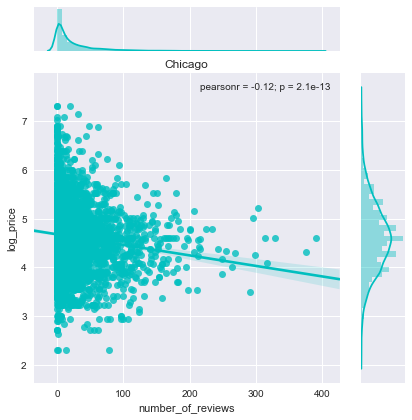

In [169]:
for c in cities:
    d = data[data['city']==c]
    g = sns.jointplot('number_of_reviews', 'log_price', data=d, kind='reg', color='c', space=0.5, ratio=5)
    plt.title(c)

[None, None]

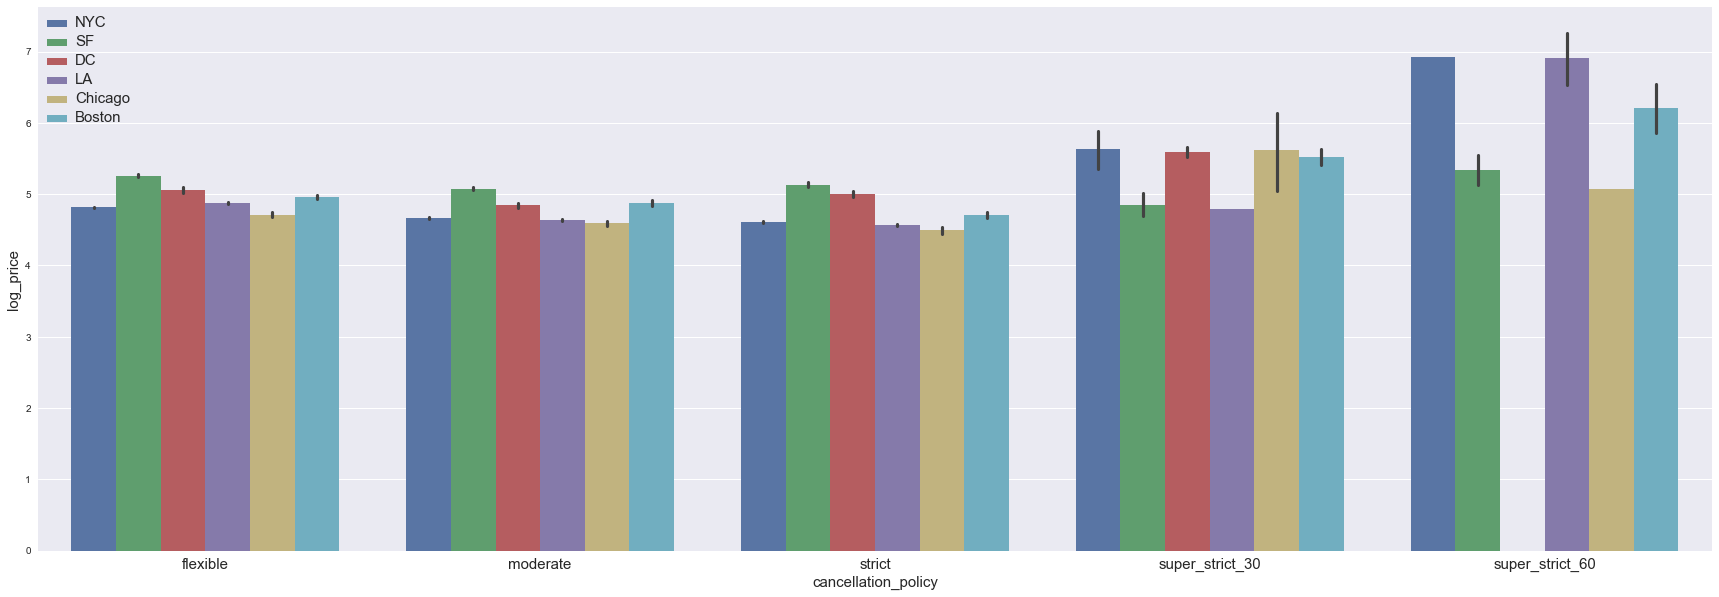

In [178]:
### Cancellation Policy
fig, ax = plt.subplots(figsize=(30, 10))
cancellation_policy = sorted(data['cancellation_policy'].value_counts().index.unique())
g = sns.barplot(ax=ax, x="cancellation_policy", y="log_price", hue='city', orient='v', data=data)
g.set_xticklabels(cancellation_policy, rotation=0, fontsize = '15')
g.set_ylabel('log_price', fontsize='15')
g.set_xlabel('cancellation_policy', fontsize='15')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='upper left')
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

[None, None]

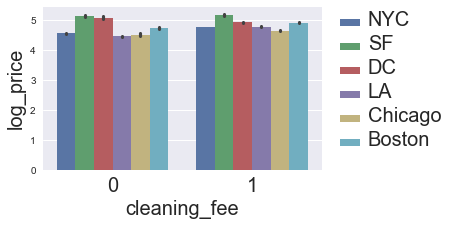

In [191]:
### Cleaning Fee
fig, ax = plt.subplots(figsize=(5, 3))
cleaning_fee = sorted(data['cleaning_fee'].value_counts().index.unique())
g = sns.barplot(ax=ax, x="cleaning_fee", y="log_price", hue='city', orient='v', data=data)
g.set_xticklabels(cleaning_fee, rotation=0, fontsize = '20')
g.set_ylabel('log_price', fontsize='20')
g.set_xlabel('cleaning_fee', fontsize='20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(loc='upper left')
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

[None, None]

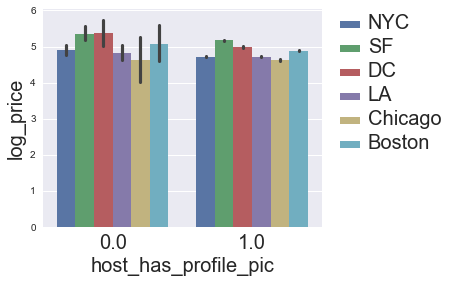

In [192]:
### Host has profile pic
fig, ax = plt.subplots(figsize=(5, 4))
host_has_profile_pic = sorted(data['host_has_profile_pic'].value_counts().index.unique())
g = sns.barplot(ax=ax, x="host_has_profile_pic", y="log_price", hue='city', orient='v', data=data)
g.set_xticklabels(host_has_profile_pic, rotation=0, fontsize = '20')
g.set_ylabel('log_price', fontsize='20')
g.set_xlabel('host_has_profile_pic', fontsize='20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(loc='upper left')
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

[None, None]

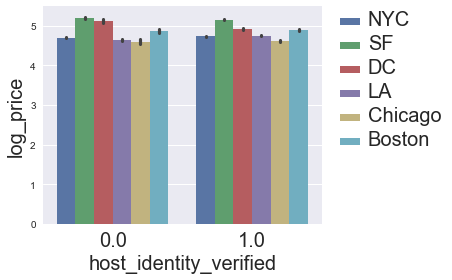

In [193]:
### Host identity verified
fig, ax = plt.subplots(figsize=(5, 4))
host_identity_verified = sorted(data['host_identity_verified'].value_counts().index.unique())
g = sns.barplot(ax=ax, x="host_identity_verified", y="log_price", hue='city', orient='v', data=data)
g.set_xticklabels(host_identity_verified, rotation=0, fontsize = '20')
g.set_ylabel('log_price', fontsize='20')
g.set_xlabel('host_identity_verified', fontsize='20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(loc='upper left')
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

[None, None]

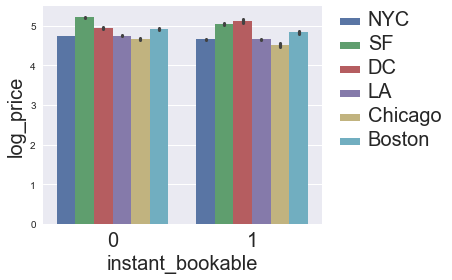

In [194]:
### Instant bookable
### Host identity verified
fig, ax = plt.subplots(figsize=(5, 4))
instant_bookable = sorted(data['instant_bookable'].value_counts().index.unique())
g = sns.barplot(ax=ax, x="instant_bookable", y="log_price", hue='city', orient='v', data=data)
g.set_xticklabels(instant_bookable, rotation=0, fontsize = '20')
g.set_ylabel('log_price', fontsize='20')
g.set_xlabel('instant_bookable', fontsize='20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(loc='upper left')
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

##### Color

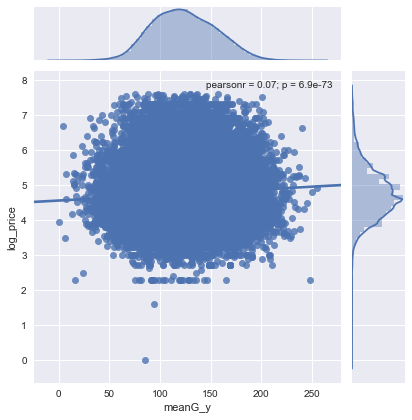

In [199]:
sns.jointplot(x='meanG_y', y='log_price', kind='reg', data=data)

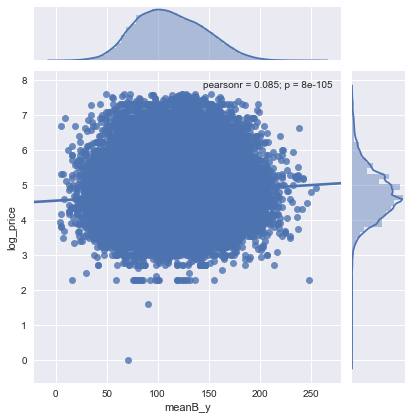

In [200]:
sns.jointplot(x='meanB_y', y='log_price', kind='reg', data=data)

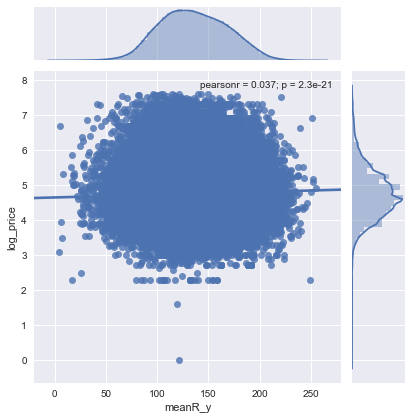

In [201]:
sns.jointplot(x='meanR_y', y='log_price', kind='reg', data=data)